In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [3]:
sonar = pd.read_csv("C:/Users/ABHISHEK/Documents/sonardata1.csv")
sonar

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,M
188,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M
189,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024,M
190,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,...,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055,M


In [4]:
sonar.shape

(192, 61)

In [5]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.02    192 non-null    float64
 1   0.0371  192 non-null    float64
 2   0.0428  192 non-null    float64
 3   0.0207  192 non-null    float64
 4   0.0954  192 non-null    float64
 5   0.0986  192 non-null    float64
 6   0.1539  192 non-null    float64
 7   0.1601  192 non-null    float64
 8   0.3109  192 non-null    float64
 9   0.2111  192 non-null    float64
 10  0.1609  192 non-null    float64
 11  0.1582  192 non-null    float64
 12  0.2238  192 non-null    float64
 13  0.0645  192 non-null    float64
 14  0.066   192 non-null    float64
 15  0.2273  192 non-null    float64
 16  0.31    192 non-null    float64
 17  0.2999  192 non-null    float64
 18  0.5078  192 non-null    float64
 19  0.4797  192 non-null    float64
 20  0.5783  192 non-null    float64
 21  0.5071  192 non-null    float64
 22  0.

In [6]:
sonar.describe()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.029497,0.039106,0.044655,0.055415,0.076601,0.105723,0.121902,0.134569,0.176786,0.205329,...,0.016046,0.013584,0.011006,0.011224,0.009675,0.008401,0.008004,0.008195,0.008187,0.006592
std,0.023663,0.033863,0.039762,0.047775,0.056975,0.060462,0.063382,0.087918,0.121930,0.138705,...,0.012372,0.009955,0.007225,0.007375,0.007230,0.005837,0.005861,0.006594,0.006243,0.005102
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001100,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016575,0.018625,0.024475,0.038050,0.067025,0.077250,0.077025,0.094700,0.104275,...,0.008050,0.007175,0.005175,0.005675,0.004375,0.004575,0.003700,0.003600,0.004300,0.003175
50%,0.022650,0.029850,0.034300,0.044500,0.063000,0.092150,0.106950,0.111200,0.145950,0.176000,...,0.013650,0.011100,0.010050,0.009550,0.007900,0.007200,0.006350,0.006050,0.006800,0.005400
75%,0.036350,0.050900,0.060400,0.069125,0.106550,0.141750,0.155150,0.171325,0.235500,0.271850,...,0.021075,0.017300,0.015200,0.014500,0.012450,0.011175,0.010525,0.010550,0.010625,0.008625
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
sonar.isnull().sum()

0.02      0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.018     0
0.0084    0
0.009     0
0.0032    0
R         0
Length: 61, dtype: int64

In [8]:
sonar['R'].value_counts()

R
R    96
M    96
Name: count, dtype: int64

In [9]:
sonar.replace({'R':{'R':0,'M':1}},inplace = True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_1936\2825849014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sonar.replace({'R':{'R':0,'M':1}},inplace = True)


In [10]:
sonar.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0


In [11]:
sonar.tail()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
187,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,1
188,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,1
189,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024,1
190,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,...,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055,1
191,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,1


In [12]:
sonar.groupby('R').mean()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
R,,,,,,,,,,,,,,,,,,,,,
0,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053
1,0.036470,0.047980,0.053430,0.069166,0.091521,0.115248,0.130036,0.151984,0.217988,0.251873,...,0.019895,0.016635,0.012339,0.012998,0.010769,0.009468,0.008299,0.009730,0.009316,0.007131


array([[<Axes: title={'center': '0.02'}>,
        <Axes: title={'center': '0.0371'}>,
        <Axes: title={'center': '0.0428'}>,
        <Axes: title={'center': '0.0207'}>,
        <Axes: title={'center': '0.0954'}>,
        <Axes: title={'center': '0.0986'}>,
        <Axes: title={'center': '0.1539'}>,
        <Axes: title={'center': '0.1601'}>],
       [<Axes: title={'center': '0.3109'}>,
        <Axes: title={'center': '0.2111'}>,
        <Axes: title={'center': '0.1609'}>,
        <Axes: title={'center': '0.1582'}>,
        <Axes: title={'center': '0.2238'}>,
        <Axes: title={'center': '0.0645'}>,
        <Axes: title={'center': '0.066'}>,
        <Axes: title={'center': '0.2273'}>],
       [<Axes: title={'center': '0.31'}>,
        <Axes: title={'center': '0.2999'}>,
        <Axes: title={'center': '0.5078'}>,
        <Axes: title={'center': '0.4797'}>,
        <Axes: title={'center': '0.5783'}>,
        <Axes: title={'center': '0.5071'}>,
        <Axes: title={'center': '0.

<Figure size 1200x1200 with 0 Axes>

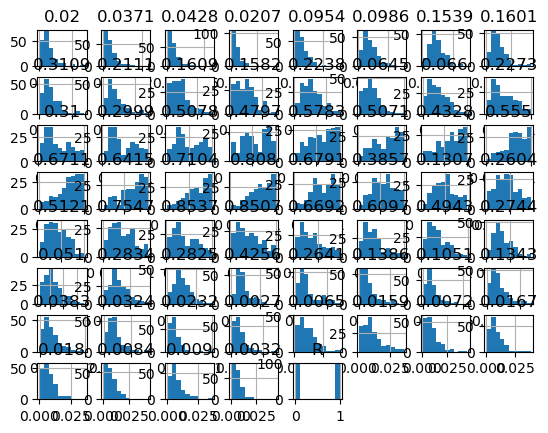

In [13]:
plot = plt.figure(figsize = (12,12))
sonar.hist()

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_1936\1291883626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sonar)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

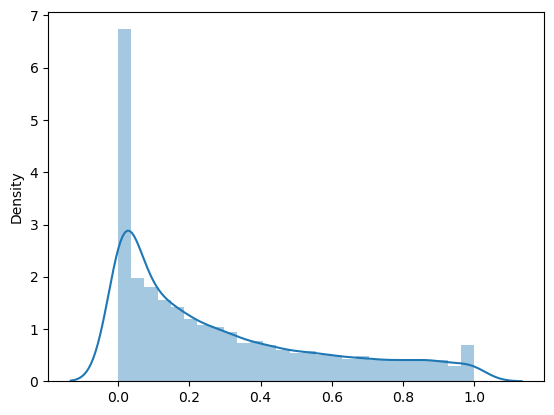

In [14]:
sns.distplot(sonar)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

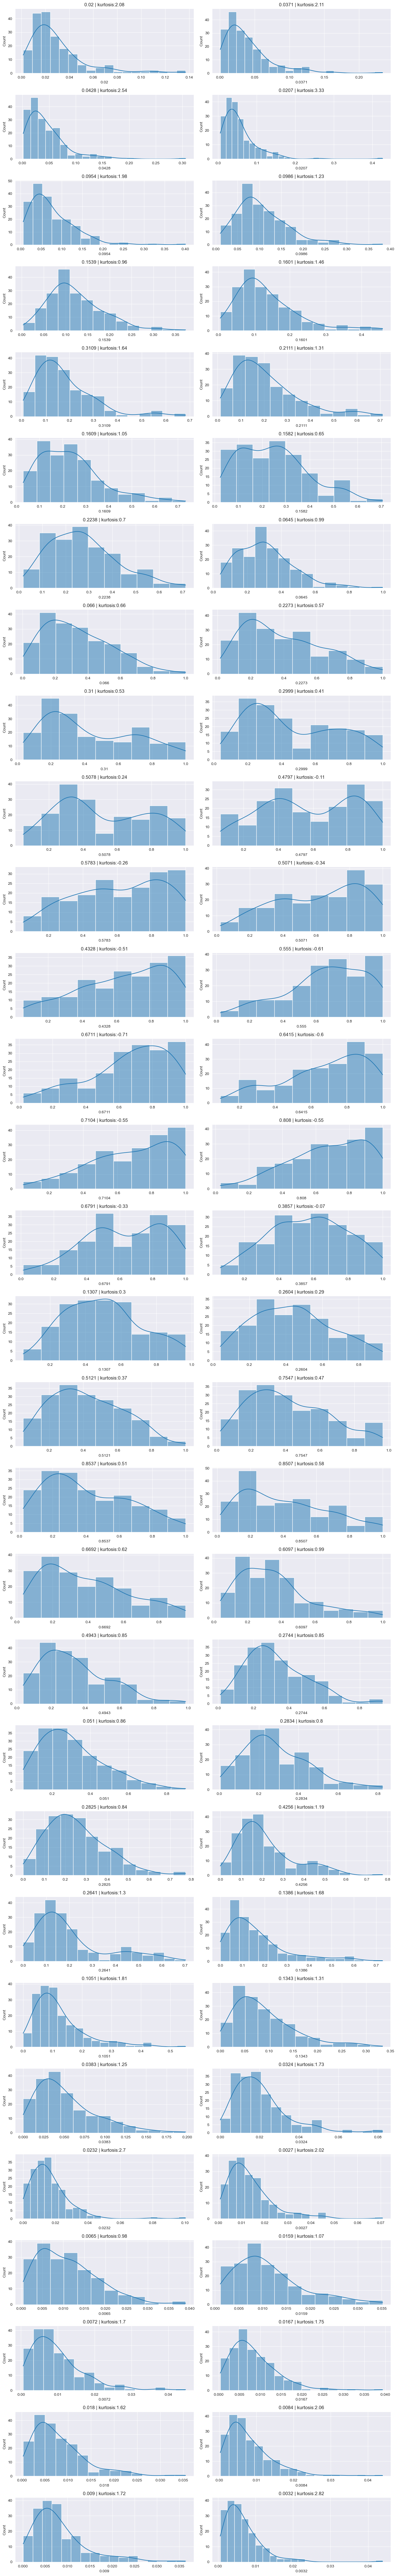

In [15]:
sns.set_style('darkgrid')
numerical_column = sonar.select_dtypes(include=['float64']).columns
plt.figure(figsize = (14,len(numerical_column)*3))
for idx,feature in enumerate(numerical_column,1):
    plt.subplot(len(numerical_column),2,idx)
    sns.histplot(sonar[feature],kde = True)
    plt.title(f'{feature} | kurtosis:{round(sonar[feature].skew(),2)}')
plt.tight_layout()
plt.show()

<Axes: xlabel='R', ylabel='count'>

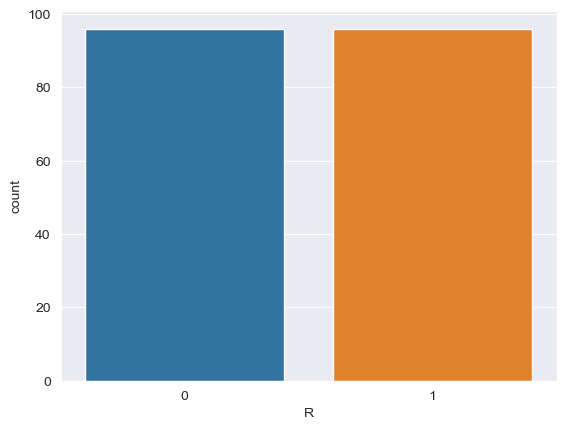

In [16]:
sns.countplot(x='R',data = sonar)

<Axes: >

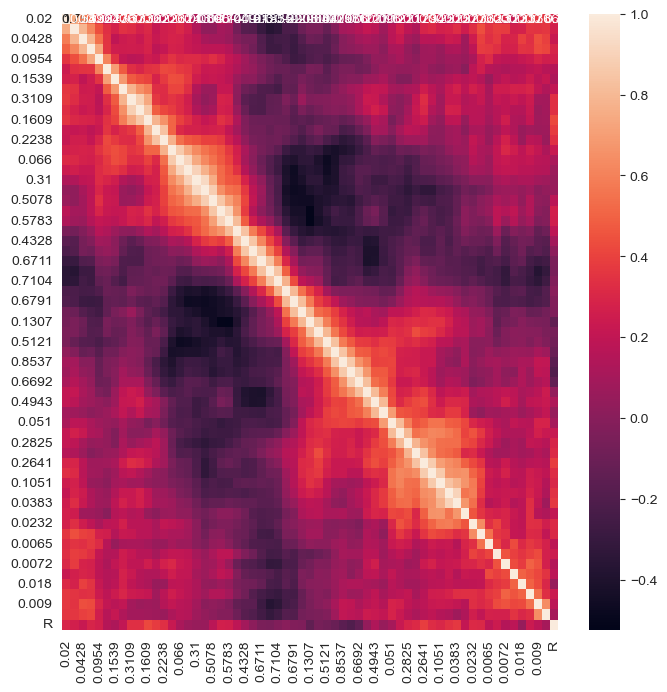

In [17]:
plt.figure(figsize = (8,8))
sns.heatmap(sonar.corr(),annot = True)

In [18]:
x = sonar.drop('R',axis = 1)
x

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0199,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018
188,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0223,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021
189,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0189,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024
190,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,...,0.0138,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055


In [19]:
y = sonar['R']
y

0      0
1      0
2      0
3      0
4      0
      ..
187    1
188    1
189    1
190    1
191    1
Name: R, Length: 192, dtype: int64

In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [55]:
x.shape,xtrain.shape,xtest.shape,y.shape,ytrain.shape,ytest.shape

((192, 60), (153, 60), (39, 60), (192,), (153,), (39,))

In [56]:
model = LogisticRegression()

In [57]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [58]:
train_data_pred = model.predict(xtrain)
train_data_accuracy = accuracy_score(train_data_pred,ytrain)
print('Accuracy of training data:',train_data_accuracy)

Accuracy of training data: 0.8300653594771242


In [59]:
test_data_predict = model.predict(xtest)
test_data_accuracy = accuracy_score(test_data_predict,ytest)
print('Accuracy of test data',test_data_accuracy)

Accuracy of test data 0.8205128205128205


In [60]:
cm = confusion_matrix(test_data_predict,ytest)
cm

array([[14,  1],
       [ 6, 18]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

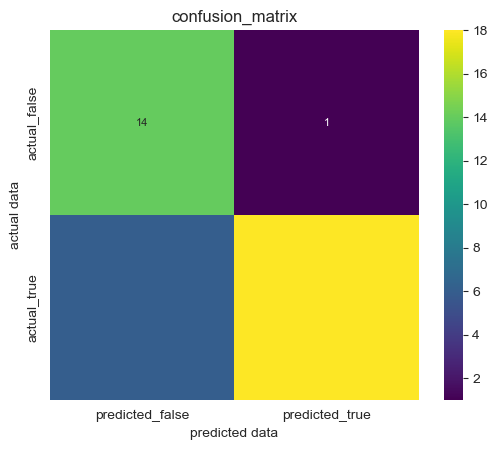

In [61]:
sns.heatmap(cm,annot = True,annot_kws = {'size':8},fmt='d',cmap = 'viridis',square = True, xticklabels = ['predicted_false','predicted_true'],
    yticklabels = ['actual_false','actual_true'])
plt.xlabel('predicted data')
plt.ylabel('actual data')
plt.title('confusion_matrix')
plt.show
            

In [62]:
print(classification_report(test_data_predict,ytest))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.95      0.75      0.84        24

    accuracy                           0.82        39
   macro avg       0.82      0.84      0.82        39
weighted avg       0.85      0.82      0.82        39



In [29]:
y_probs = model.predict_proba(xtest)[:,1]
y_probs

array([0.09518131, 0.71784728, 0.25909449, 0.42543885, 0.5443009 ,
       0.62087561, 0.70441425, 0.40892642, 0.19665619, 0.66297811,
       0.97464017, 0.68610177, 0.30869218, 0.25084837, 0.54734456,
       0.47371213, 0.84968651, 0.48081822, 0.17333765, 0.15429121,
       0.39686945, 0.76212672, 0.56463148, 0.67651574, 0.87594665,
       0.18686135, 0.10583233, 0.67479038, 0.6787913 , 0.50972907,
       0.56701045, 0.54656539, 0.80572604, 0.89963063, 0.52548053,
       0.56350444, 0.56538367, 0.32209533, 0.58783433])

In [30]:
fpr,tpr,thresholds = roc_curve(ytest,y_probs)

In [31]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8789473684210527

<function matplotlib.pyplot.show(close=None, block=None)>

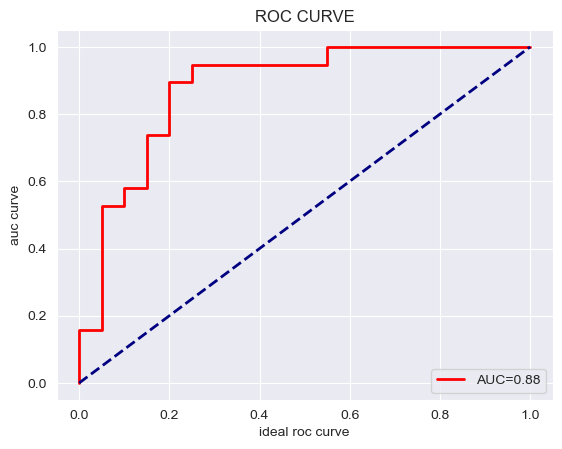

In [32]:
plt.figure()
plt.plot(fpr,tpr,color = 'red',lw = 2,label = f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
plt.xlabel('ideal roc curve')
plt.ylabel('auc curve')
plt.title('ROC CURVE')
plt.legend(loc = 'lower right')
plt.show


In [69]:
new_data =(0.0629,0.1065,0.1526,0.1229,0.1437,0.119,0.0884,0.0907,0.2107,0.3597,0.5466,0.5205,0.5127,0.5395,0.6558,0.8705,0.9786,0.9335,0.7917,0.7383,0.6908,0.385,0.0671,0.0502,0.2717,0.2839,0.2234,0.1911,0.0408,0.2531,0.1979,0.1891,0.2433,0.1956,0.2667,0.134,0.1073,0.2023,0.1794,0.0227,0.1313,0.1775,0.1549,0.1626,0.0708,0.0129,0.0795,0.0762,0.0117,0.0061,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.023,0.0057,0.0113,0.0131)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1, -1)

prediction = model.predict(new_data_reshaped)



print(f"Prediction: {prediction[0]}")

# Adjusted logic
if prediction[0] == 0:
    print('The object is rock')
else:
    print('The object is mine')


Prediction: 1
The object is mine


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
